# Introduction

[On February 20, 2023, the Twitter hashtag "civil war" was trending, as Twitter users reacted to a tweet from Georgia Republican Congresswoman Marjorie Taylor Greene, which called for a "national divorce."](https://www.seattletimes.com/nation-world/nation-politics/civil-war-trends-after-marjorie-taylor-greene-tweets-asks-for-national-divorce/)

Originally, I assumed that the overwhelming majority of these tweets were in agreement with Greene's idea of "national divorce," and that they were entertaining the idea of civil war.  I had this assumption because of the timing of this tweet. It occurred not too long [after the former President Donald Trump's Mar-a-lago home was raided by the Federal Bureau of Investigation (FBI)](https://www.nytimes.com/2022/10/05/us/politics/civil-war-social-media-trump.html#:~:text=Posts%20on%20Twitter%20that%20mentioned,Trump's%20social%20media%20platform.) and [after a Trump supporter from Iowa stated that they felt a civil war was coming](https://www.forbes.com/sites/petersuciu/2021/10/10/civil-war-trending-on-twitter-after-comment-made-by-trump-supporter/?sh=6af443b71853), two events that also led to an increase of tweets about civil war. 

However, I wanted to gain a better understanding of the context of these tweets and see if my assumptions were true. To do so, I scraped and analyzed over 3,000 tweets containing the phrase "Civil War" and mentioning Greene's Twitter handle. All tweets were written between February 20-26, 2023.

# Importing the Libraries We Will Need

In [1]:
# Selenium Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common import TimeoutException

# Other Imports
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

# Preliminaries

## Utility Functions

In [2]:
# Wait for a random time between 4 and 8 seocnds
def r():
    time.sleep(np.random.uniform(4, 8))

In [3]:
def write(box, text, enter = True):
    for char in text:
        box.send_keys(char)
        time.sleep(np.random.uniform(0.1, 0.5))
    if enter:
        box.send_keys(Keys.ENTER)

## Prepping the Scrapper

In [4]:
# Setting User Agent Header as well as other Request Headers
# This can be retrieved from http://httpbin.org/anything <-
headers = {
    # Headers here
}

Create a function that creates a ModHeader URL.

In [5]:
def create_header_url(headers):
    prefix = "https://webdriver.modheader.com/add?"
    for name in headers:
        prefix += name + "=" + headers[name] +"&"
    # Remove the final &
    prefix = prefix[:-1]
    # Replace spaces with %20
    prefix = prefix.replace(" ", "%20")
    return prefix

Add ModHeader as an extension

In [ ]:
# To download the extension and find more info: https://modheader.com/docs/advanced/selenium-webdriver  
# File should be in the same directory as this notebook
op = webdriver.ChromeOptions()
op.add_extension("modheader.crx")

In [ ]:
# Path to Chromedriver
# Downloads : https://chromedriver.chromium.org/downloads
# If you have 116 : https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/116.0.5845.96/win64/chromedriver-win64.zip
# File should be in the same directory as this notebook
CHROME = "chromedriver.exe"

## Tests

In [ ]:
# Are the headers working?
s = Service(executable_path = CHROME)
browser = webdriver.Chrome(service = s, options = op)
browser.set_window_size(1750, 1000)
browser.get(create_header_url(headers))
r()
browser.get("https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending")
time.sleep(10)
browser.close()

## Twitter Info

In [ ]:
# Input Twitter Login information <-
user = # username here
password = # password here

# ---------------------------

hashtag = "#civilwar"
phrase = "Civil War"

In [10]:
"""
sdm: start date month      sdd: start date day      sdy: start date year
edm: end date month        edd: end date day        edy: end date year
"""
curr_year = 2023
sdm = 2
sdd = 20
sdy = 2023

start_date = f'{sdy}-{sdm:02}-{sdd:02}'
# Note that the end date is EXCLUSIVE!
edm = 2
edd = 27
edy = 2023
    
end_date  = f'{edy}-{edm:02}-{edd-1:02}'

# If True, look for ALL tweets matching the description 
# Note that all tweets are not guaranteed to show up, for reasons from Protected Tweets to Twitter Limitations
# More on this here: 
#     https://help.twitter.com/en/using-x/replies-not-showing-up-and-hashtag-problems#:~:text=If%20you're%20not%20seeing,show%20all%20of%20these%20replies.
#     https://techzillo.com/twitter-replies-not-showing-up/

infinite = True 

# If infinite is False, the minimum number of tweets to extract should instead be given here
min_tweets = 10  

# Scraping the data

You can manually scrape the data using the code below. Alternatively, you can load the xlsx workbook, which already contains the scraped tweets.

In [11]:
scrape_data = False

In [12]:
if scrape_data:
    # Go on Google and open Twitter
    ## Load Headers and Navigate to Google
    s = Service(executable_path = CHROME)
    browser = webdriver.Chrome(service = s, options = op)
    browser.set_window_size(1750, 1000)
    browser.get(create_header_url(headers))
    r()
    browser.get("https://google.com")

    ## Find Google Search Box
    ## Note: All XPath variables end in "xp"
    google_search_box_xp = '//*[@id="APjFqb"]'
    google_search_box = browser.find_element(By.XPATH, google_search_box_xp)

    ## Type Twitter
    write(google_search_box, "twitter")
    r()

    ## Click the First link
    twitter_link_xp = '//*[@id="rso"]/div[1]/div/div/div/div/div/div/div/div[1]/div/span/a'
    twitter_link = browser.find_element(By.XPATH, twitter_link_xp)
    twitter_link.click()
    r()

In [13]:
if scrape_data:
    # Login
    ## Press Login Button
    login_button_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div[1]/div[1]/div/div[3]/div[5]/a'
    login_button = browser.find_element(By.XPATH, login_button_xp)
    login_button.click()
    r()

In [14]:
if scrape_data:
    ## Add Username
    username_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input'
    username_box = browser.find_element(By.XPATH, username_xp)
    write(username_box, user)
    r()

In [15]:
if scrape_data:
    ## Add Password
    password_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input'
    password_box = browser.find_element(By.XPATH, password_xp)
    write(password_box, password)
    r()

Manually exit any popup messages, if necessary (i.e. messages asking you to boost your account security).

In [16]:
if scrape_data:
    input("Manually exit any popup messages, if necessary (i.e. messages asking you to boost your account security).\nPress enter when ready to proceed.")

In [17]:
if scrape_data:    
    # Navigate to Search Box and Search for the hashtag (in this case, Civil War)
    # It doesn't really matter what we put here though, as we will define the specific criteria for tweets in the
    #    advanced settings.
    search_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/label/div[2]/div/input'
    search_box = browser.find_element(By.XPATH, search_xp)
    write(search_box, hashtag)
    r()

In [18]:
if scrape_data:
    # Include Advanced Settings
    ## Press three dots
    three_dots_xp = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[1]/div/div/div/div/div[3]/div/div'
    three_dots = browser.find_element(By.XPATH, three_dots_xp)
    three_dots.click()
    r()

In [19]:
if scrape_data:
    ## Press Advanced Search
    adv_search_xp = '//*[@id="layers"]/div[2]/div/div/div/div[2]/div/div[3]/div/div/div/a[2]/div[2]/div/span'
    adv_search = browser.find_element(By.XPATH, adv_search_xp)
    adv_search.click()
    r()

In [20]:
if scrape_data:
    ## Add Phrase
    phrase_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[2]/div/div[2]/div[1]/div/label/div/div[2]/div/input'
    phrase_box = browser.find_element(By.XPATH, phrase_xp)
    write(phrase_box, phrase, False)
    r()

In [21]:
if scrape_data:
    ## Specify Language
    language_box = browser.find_element(By.TAG_NAME, "select")
    language_box.send_keys("E")
    r()

In [22]:
if scrape_data:   
    ## Filter only Tweets that mention @mtgreenee
    reply_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[2]/div/div[5]/div[3]/div/label/div/div[2]/div/input'
    reply_box = browser.find_element(By.XPATH, reply_xp)
    write(reply_box, "@mtgreenee", False)
    r()

In [23]:
if scrape_data: 
    ## Select Start dates and end dates
    date_selector_codes = {"sdm": (2, sdm),
                           "sdd": (3, sdd),
                           "sdy": (4, sdy),
                           "edm": (5, edm),
                           "edd": (6, edd),
                           "edy": (7, edy)}

    #### We need to calculate how many times to press the down arrow key to select
    #### the correct option.
    #### For all but the years, it is simply pressing the down arrow x times,
    #### where x is the month or day number
    #### For the years, x = curr_year - selected_year + 1

    for name, [ID, value] in date_selector_codes.items():
        drop_down = browser.find_elements(By.TAG_NAME, 'select')[ID - 1]
        drop_down.click()
        if name not in ("sdy", "edy"):
            for i in range(value):
                drop_down.send_keys(Keys.ARROW_DOWN)
                time.sleep(0.2)
        else:
            for i in range(curr_year - value + 1):
                drop_down.send_keys(Keys.ARROW_DOWN)
                time.sleep(0.2)

    drop_down.send_keys(Keys.ENTER)
    r()

In [24]:
if scrape_data:    
    ##  Press the Search Button
    search_button_xp = '//*[@id="layers"]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[1]/div/div/div/div/div/div[3]/div/div/span/span'
    search_button = browser.find_element(By.XPATH, search_button_xp)
    search_button.click()
    r()

In [25]:
if scrape_data:   
    # Move to the Latest Tab
    latest_xpath = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div[2]/nav/div/div[2]/div/div[2]/a/div/div/span'
    latest_tab = browser.find_element(By.XPATH, latest_xpath)
    latest_tab.click()
    r()

In [26]:
if scrape_data:
    # Scrap Tweets
    ## Note: twitterhandle is only used to remove duplicate tweets
    ## the twitterhandle columns is dropped afterwards.

    tweets = pd.DataFrame(columns = ['twitterhandle', 'date', 'tweet'])
    row_id = 0

In [27]:
if scrape_data:   
    row_id = len(tweets) # In case this code cell needs to be re-ran

    prev_page_height = 0
    
    # https://stackoverflow.com/questions/61877719/how-to-get-current-scroll-height-in-selenium-python
    curr_page_height = browser.execute_script("return window.pageYOffset + window.innerHeight")

    while (infinite and prev_page_height != curr_page_height) or            \
          (not infinite and len(tweets) < min_tweets and prev_page_height != curr_page_height):
        
        ## Each time we scroll through this page, the HTML code updates to show only a couple of tweets on the page
        ## Thus, we will have to scrape the tweets in batches
        ## Wait for the first batch of tweets to show up in the HTML code.
        r()

        ## Extract HTML and parse through it with BeautifulSoup
        soup = BeautifulSoup(browser.page_source, 'lxml')

        ### Get twitterhandles
        temp = soup.find_all(name = 'a', class_ = "css-4rbku5 css-18t94o4 css-1dbjc4n r-1loqt21 r-1wbh5a2 r-dnmrzs r-1ny4l3l",
                             attrs = {"tabindex": "-1"})
        handles = [x.div.span.text    for x in temp]

        ### Get the Dates that the tweets were sent
        temp = soup.find_all(name = 'time')
        dates = [x["datetime"][ : 10]   for x in temp]

        ### Get the tweets
        temp = soup.find_all(name = 'article')
        available_tweets = []
        for x in temp:
            try:
                available_tweets.append(x.find(name = "div", attrs={"data-testid": "tweetText"}).text)
            except AttributeError:
                print("Warning - Tweet without .text attribute")

        ## Zip up information
        rows = zip(handles, dates, available_tweets)
        temp_df = pd.DataFrame.from_records(rows, columns =['twitterhandle', 'date', 'tweet'])
        temp_df.drop_duplicates(inplace = True)

        ## Add information to the main tweets data frame
        tweets = pd.concat([tweets, temp_df], axis = 0, ignore_index= True)
        
        ## Update prev_page_height to be curr_page_height, scroll down to the bottom of the page and update curr_page_height 
        prev_page_height = curr_page_height
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        curr_page_height = browser.execute_script("return window.pageYOffset + window.innerHeight")

        ### Relax for a second (or 30...)
        time.sleep(np.random.uniform(30, 50))

In [28]:
if scrape_data:
    browser.close()

Let's clean up the data frame.

In [29]:
if scrape_data:
    # Remove any duplicates
    tweets.drop_duplicates(inplace = True, ignore_index = True)
    
    # Make sure that the date columns is of a datetime type
    tweets["date"] = tweets["date"].astype("datetime64")

    # Removing the Twitter Handle, now that we've removed duplicates
    tweets.drop(["twitterhandle"], axis = 1, inplace = True)

    # Remove any tweets are not in the date range but somehow got here. Sort by Date.
    tweets.sort_values("date", inplace = True)
    indices_to_drop = tweets.index[~ np.isin(tweets["date"], pd.date_range(start_date, end_date))]
    tweets.drop(indices_to_drop, inplace = True)
    tweets.reset_index(inplace = True, drop = True)

Here is the final product.

In [30]:
if scrape_data:
    tweets.to_excel("tweets.xlsx", index= False)
else:
    tweets = pd.read_excel("tweets.xlsx")

# Preprocessing the Text

In [31]:
# Put all tweets in a list.
tweets_list = []
for tweet in tweets["tweet"]:
    tweets_list.append(tweet)

First, let's make all tweets lowercase.

In [32]:
tweets_list = [x.lower() for x in tweets_list]

Now, let's turn each tweet into a spaCy document.

In [33]:
import spacy
from spacy.tokenizer import _get_regex_pattern
import re
nlp = spacy.load('en_core_web_sm')

# Add new regex patterns for token detection, to detect
#    Hashtags
#    Percents
#    words with - in them (i.e. high-tech)
# Adapted from : https://stackoverflow.com/questions/43388476/how-could-spacy-tokenize-hashtag-as-a-whole
re_token_match = _get_regex_pattern(nlp.Defaults.token_match)
re_token_match = fr"({re_token_match}|#\w+|\w+-\w+|\d+%)"
nlp.tokenizer.token_match = re.compile(re_token_match).match

tweets_list = [nlp(x)    for x in tweets_list]

Now, let's lemmatize each token.

In [34]:
# Find the lemma of each token and turn it back into a Spacy Token
for ind, doc in enumerate(tweets_list):
    tweets_list[ind] = [nlp.tokenizer(token.lemma_)[0]    for token in doc]

Finally, let's make each entry in `tweets_list` a list of spaCy tokens, where the tokens are

* not whitespace
* not punctuation
* not stop words 

Additionally, we can add additional words that we'd like to treat as stop words.

I've prevented {"first", "last", "keep", "former", "empty"} from being treated as stop words.

In [35]:
from spacy.lang.en import stop_words
custom_stop_words = stop_words.STOP_WORDS.difference({"first", "last", "keep", "former", "empty"})

# Optional additional stop words to ignore. Write words in lowercase
ignore = []
custom_stop_words.update(set(ignore))

for i in range(len(tweets_list)):
    tweet_doc = tweets_list[i]
    tweets_list[i] = [token   for token in tweet_doc  if not token.is_punct and 
                                                         not token.is_space and 
                                                         not token.text.lower() in custom_stop_words]

We have finished cleaning the text.
Let's save all of the 1-grams and 2-grams.

In [36]:
# Save all 1-grams
onegrams = []
for x in tweets_list:
    onegrams += x
onegrams_text = [x.text  for x in onegrams]

In [37]:
# Save all 2-grams
from nltk import ngrams
twograms = []
for x in tweets_list:
    twograms += list(ngrams(x, 2))

# Results

Here are the top 50 1-grams (after lemmatization and stop word removal).

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

In [39]:
onegrams_freq = Counter(dict(sorted(Counter(onegrams_text).items(), key = lambda item: item[1], reverse = True)))
onegrams_freq

Counter({'war': 3759,
         'civil': 3648,
         'state': 724,
         'want': 602,
         'like': 442,
         'divorce': 336,
         'country': 313,
         'people': 308,
         'red': 299,
         'try': 296,
         'need': 290,
         'right': 257,
         'think': 239,
         'know': 224,
         'lose': 223,
         'blue': 213,
         'time': 212,
         'start': 209,
         'national': 199,
         'traitor': 188,
         'america': 186,
         'congress': 183,
         'talk': 180,
         'secession': 174,
         'advocate': 168,
         'fight': 167,
         'happen': 163,
         'last': 159,
         'constitution': 158,
         'history': 157,
         'let': 154,
         'government': 153,
         'way': 146,
         '@mtgreenee': 146,
         'treason': 146,
         'work': 145,
         'union': 136,
         'good': 135,
         'leave': 134,
         'thing': 133,
         'united': 120,
         'sound': 118,
        

In [40]:
def plot_grams(counter, start, end, title, save = False):
    freqs = [] # Frequencies of each n-gram
    words = [] # Each n-gram
    
    i = 0 # Variable to tell us when to start adding frequencies and n-grams to the lists
          # (Will only do so when between start(inclusive) and end (inclusive))
    for gram, freq in counter.items():
        i += 1
        
        # Check if i is between start and end
        if i < start :
            continue
        if i > end:
            break
            
        # If so!
        else:
            words.append(gram)
            freqs.append(freq)

    fig, ax = plt.subplots(figsize = (12, 7), dpi = 300)
    ax.bar(range(0, len(freqs)), freqs)
    
    # Add labels and title
    ax.set_xticks(range(0, len(freqs)), words, rotation = "vertical", fontsize = 10)
    ax.set_ylabel("Frequency", labelpad = 10)
    ax.set_title(title)
    
    if save:
        fig.savefig("fig", bbox_inches = "tight")
    plt.show()

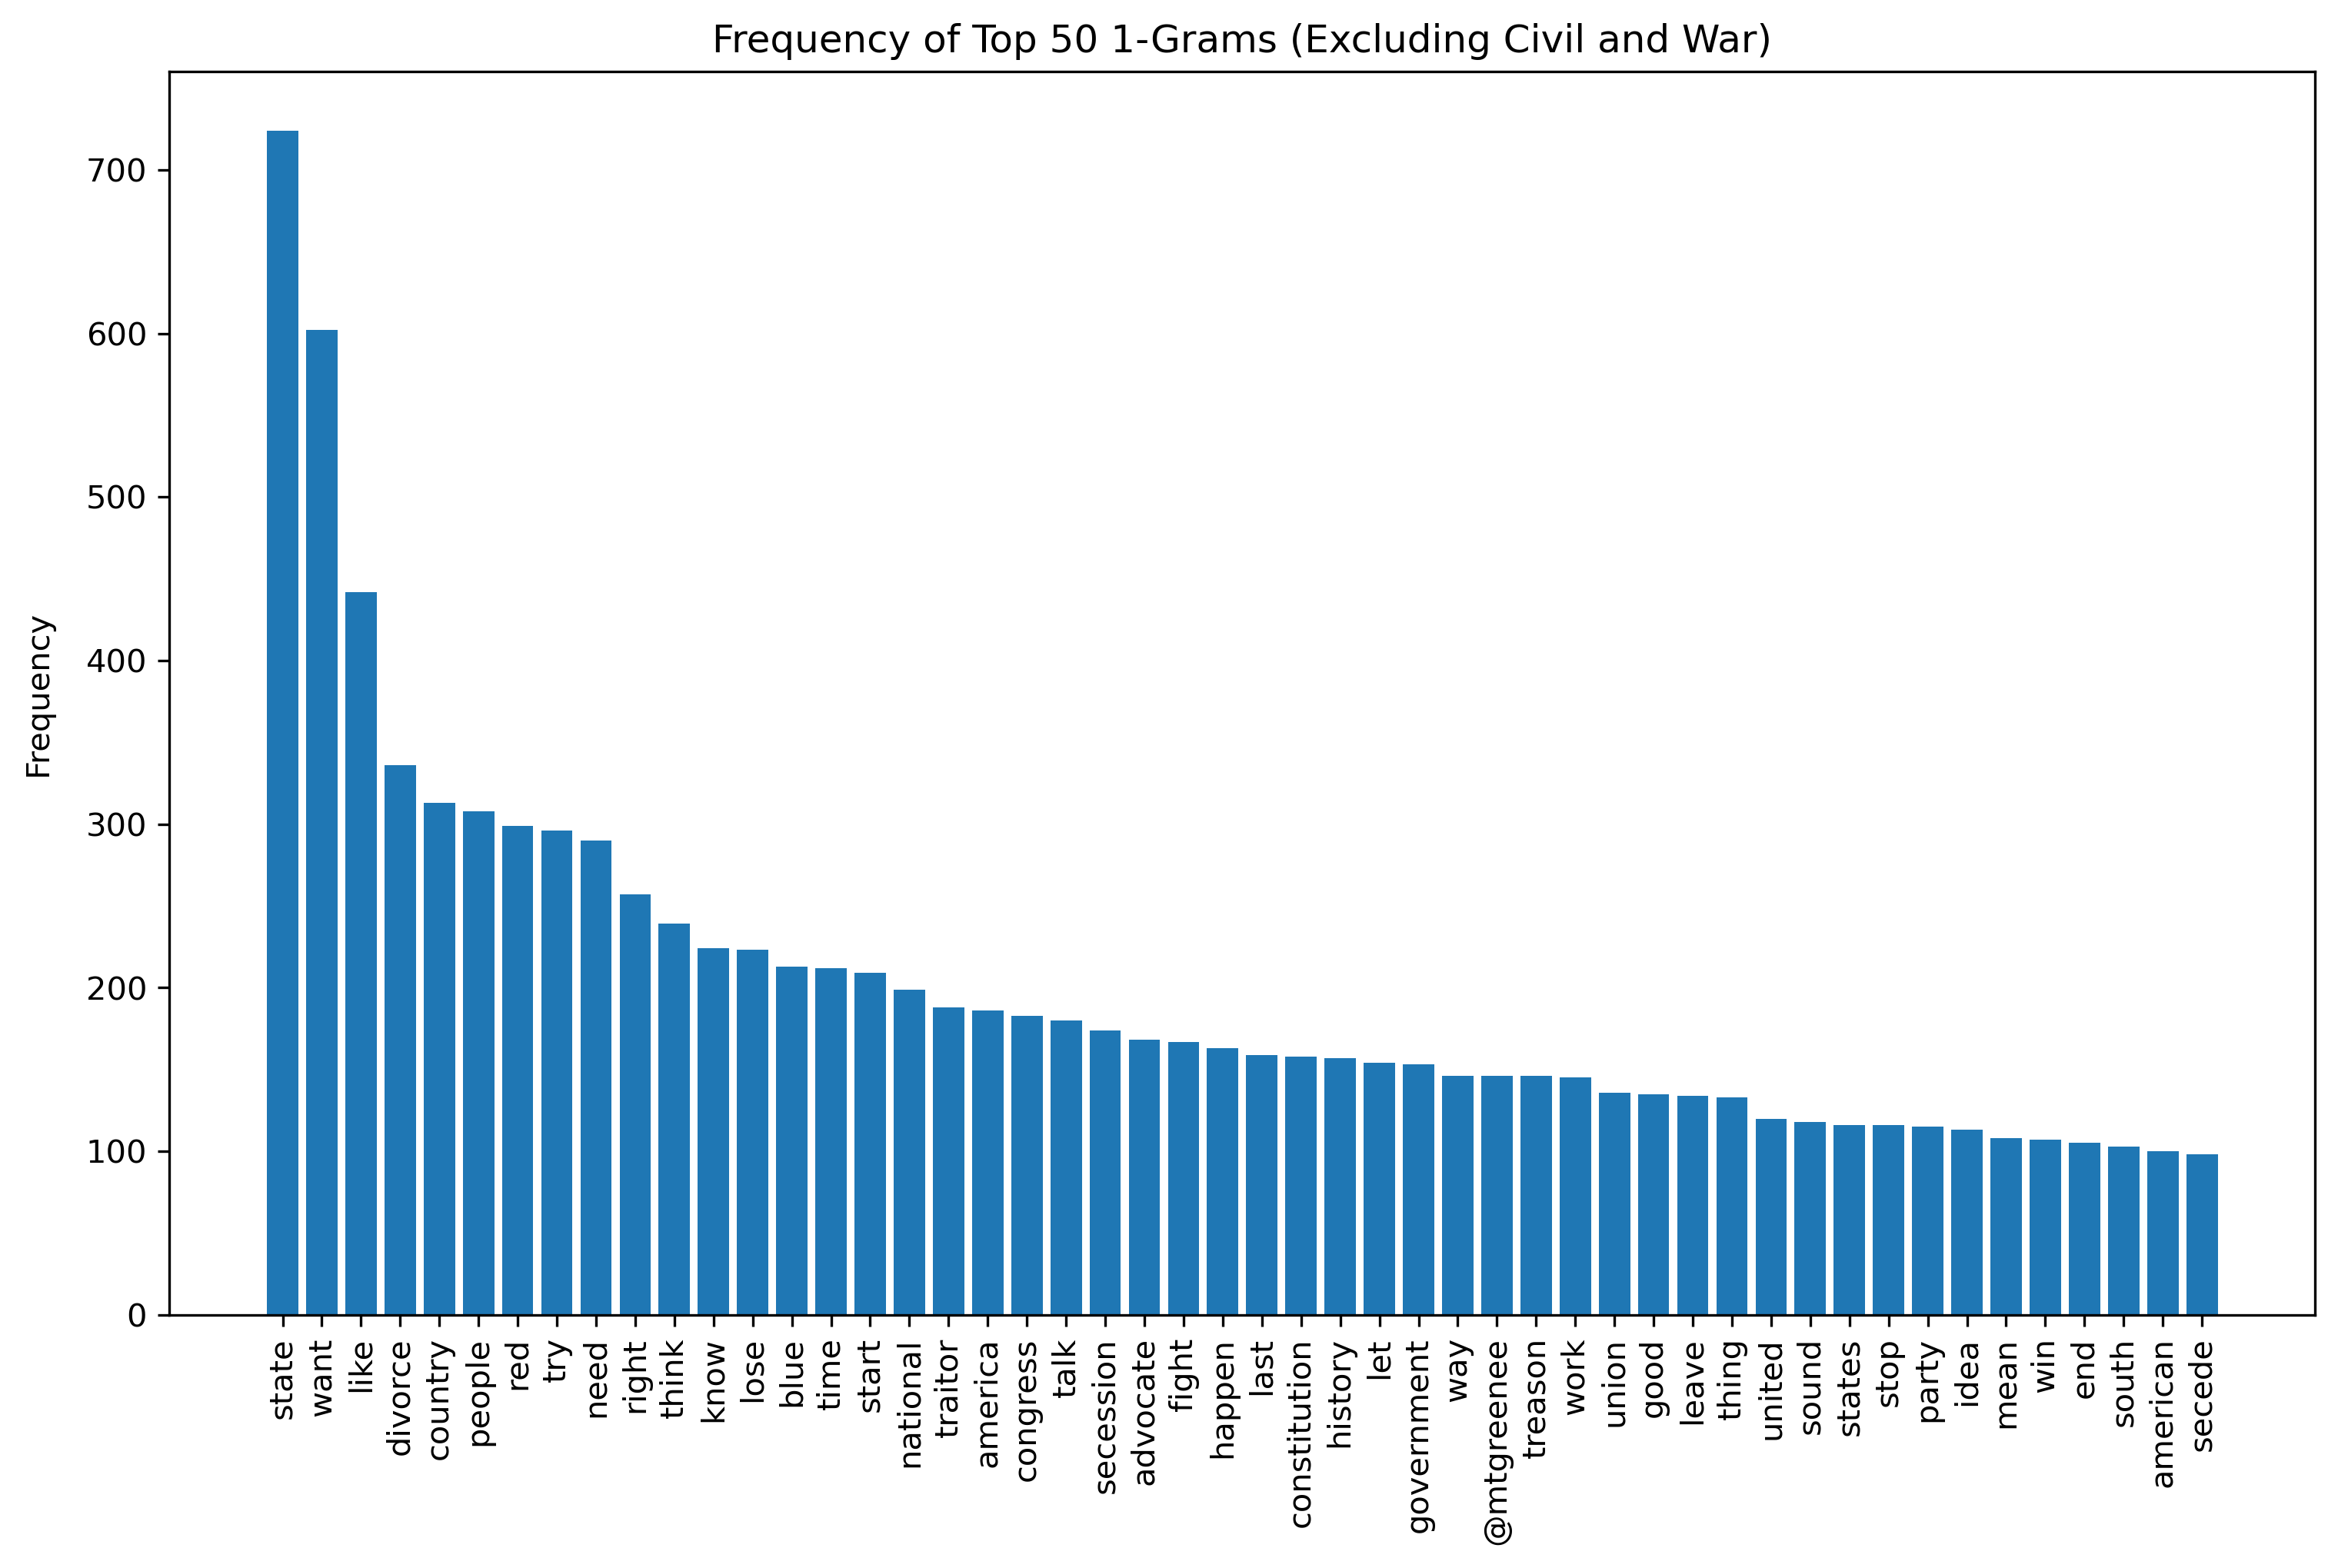

In [41]:
plot_grams(onegrams_freq, 3, 52, "Frequency of Top 50 1-Grams (Excluding Civil and War)", True)

The high frequency of "traitor" and "treason" already provides us with insights into the sentiments of some of the tweets.

Now, let's consider the top 50 2-grams (after lemmatization and stop word removal).

In [42]:
twograms_freq = Counter(dict(sorted(Counter([str(twogram)  for twogram in twograms]).items(), key = lambda item: item[1], reverse = True)))
twograms_freq

Counter({'(civil, war)': 3606,
         '(red, state)': 199,
         '(want, civil)': 195,
         '(national, divorce)': 167,
         '(blue, state)': 131,
         '(advocate, civil)': 109,
         '(start, civil)': 96,
         '(united, states)': 95,
         '(sound, like)': 86,
         '(like, civil)': 78,
         '(last, time)': 72,
         '(war, want)': 61,
         '(lose, civil)': 61,
         '(member, congress)': 58,
         '(second, civil)': 57,
         '(incite, civil)': 54,
         '(fight, civil)': 53,
         '(divorce, civil)': 47,
         '(try, civil)': 46,
         '(lead, civil)': 46,
         '(war, 2)': 45,
         '(federal, government)': 45,
         '(win, civil)': 40,
         '(talk, civil)': 40,
         '(war, lose)': 39,
         '(states, america)': 38,
         '(state, right)': 37,
         '(secession, civil)': 37,
         '(need, civil)': 37,
         '(war, right)': 35,
         '(war, know)': 34,
         '(war, need)': 34,
       

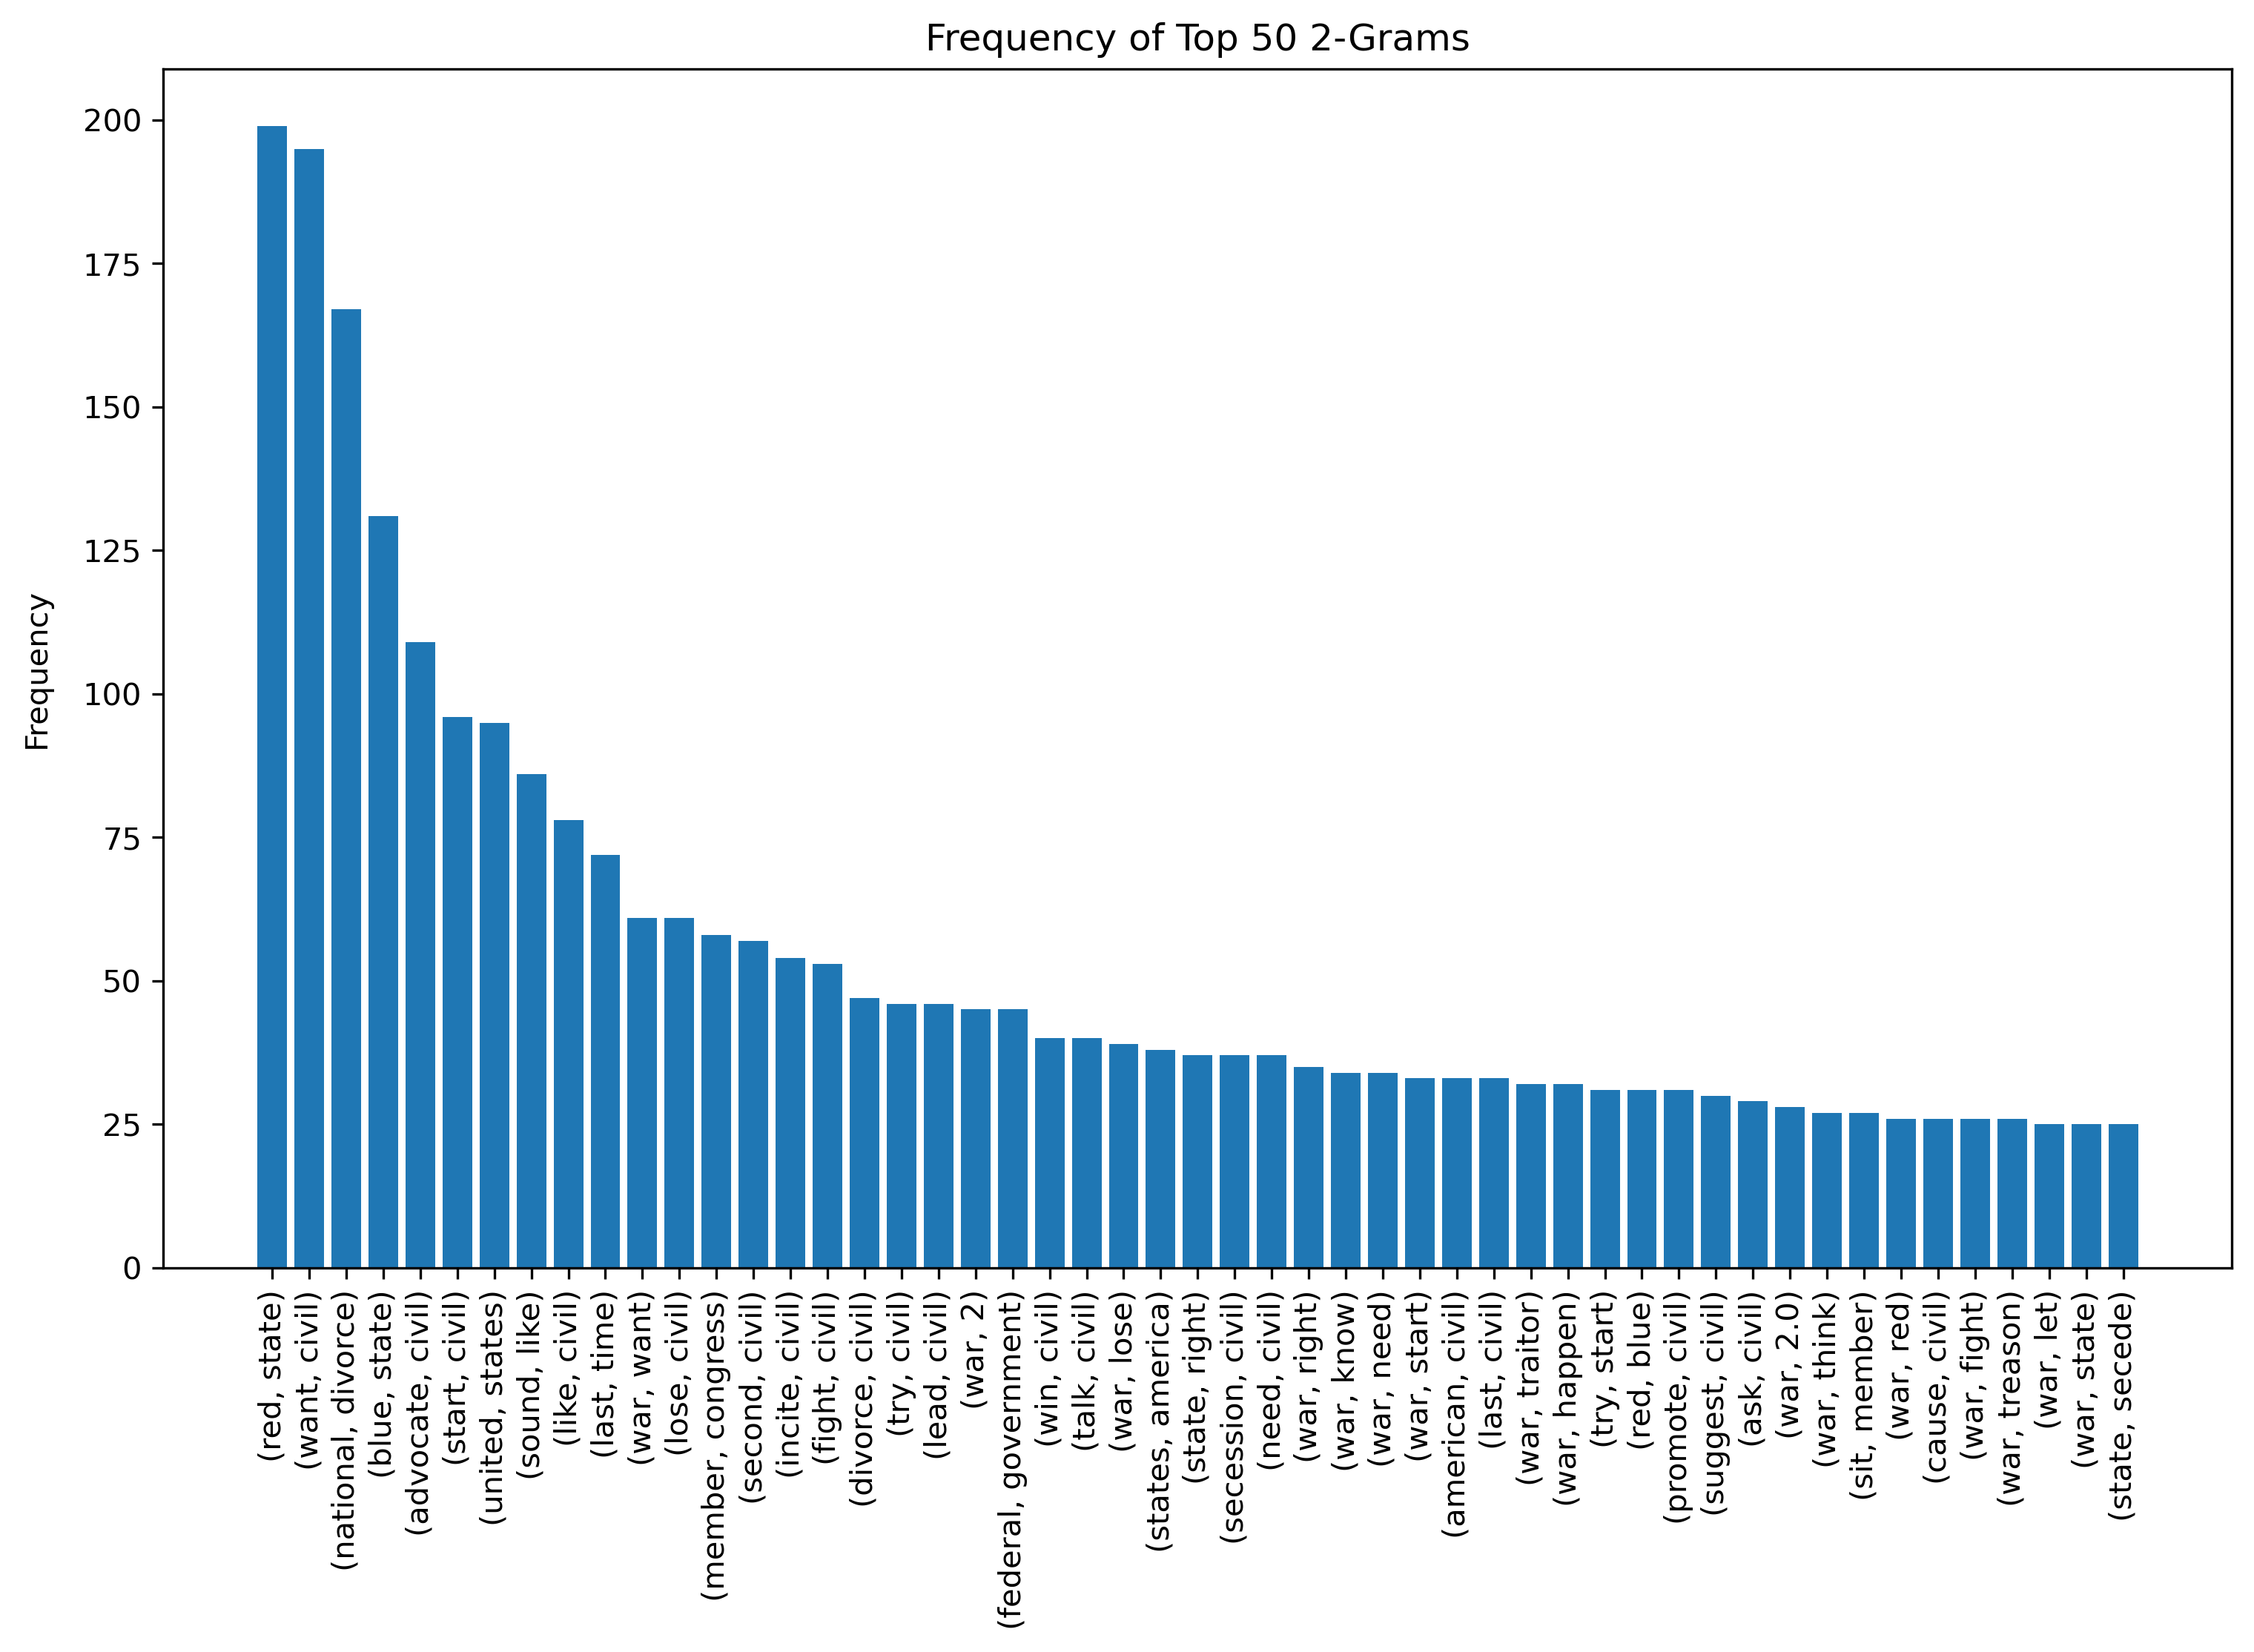

In [43]:
plot_grams(twograms_freq, 2, 52, "Frequency of Top 50 2-Grams")

Among the most common 2-grams are "advocate civil", "incite civil", "promote civil",  "sound like" (i.e., "sounds like Civil War 2.0"), "suggest civil", "war 2" (i.e., Civil War 2), and  "war 2.0."



Many users were claiming that the idea of a "national divorce" was a "dog-whistle" for a civil war.


Below shows 20 tweets that contain phrases similar to any of these following phrases

* advocate civil

* promote civil

* suggest civil

* sound like

In [44]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))        # Display all rows
    pd.set_option('display.max_columns', x.shape[1]) # Display all columns
    pd.set_option('display.max_colwidth', None)      # Display all characters in each entry
    
    display(x)
    
    # Reset Options
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option("display.max_colwidth")

In [45]:
def find_tweets_with_gram(gram_list, top_n = None, return_df = False):
    # Where we will save the indices of each tweet in the tweets df that contained an n-gram (after lemmatization and 
    #    stop word removal) in gram_list
    indices = []
    
    # Check if n-gram is in each tweet_doc
    # If so, append the index of the tweet_doc (and thus, the index of the tweet itself)
    for ind, tweet_doc in enumerate(tweets_list):
        temp = [token.text   for token in tweet_doc]
        string = " ".join(temp)
        for gram in gram_list:
            if gram in string:
                indices.append(ind)
    
    # Remove duplicates
    indices = np.unique(indices)
    
    if top_n is None: # Return ALL tweets matching the criteria
        df = tweets.iloc[indices, [1]].copy()
    else: # Return the first top_n tweets matching the criteria
        df = tweets.iloc[indices[:top_n], [1]].copy()
        
    # Remove \n
    df["tweet"] = df["tweet"].str.replace("\n", " ")

    if return_df:
        return df
    print_full(df)
       
find_tweets_with_gram(['advocate civil', "promote civil", "suggest civil", "sound like"], 20)

,tweet
4,So you're advocating civil war. @FBI please arrest this woman.
17,Advocating for another civil war. Didn’t work out the first time.
21,So you’re basically advocating for civil war.
27,So your advocating for a civil war? Interesting
37,Are you suggesting civil war? That will be fine. How will Georgia fit? Has your pea brain put any thought into this?
47,"Basically, you are advocating for a civil war. And the red states can compensate the blue states for all the money we spent on them."
50,You are litterally advocating for a Civil War..This is what happens when you vote stupid people with extremist views into power
58,sounds like Civil War 2.0 you have violated your oath of office and are a self-declared traitor and racist.
60,So you’re advocating for another Civil War???
62,"Sort of sounds like you're advocating for a civil war? Possibly a revolution. Maggie, are you threatening the safety and security of the United States because you have the second most fragile ego in the world?"


In [46]:
# What proportion of tweets used one of the below phrases?

len(find_tweets_with_gram(['traitor', 'treason', 'treasonous','advocate civil',
                           "incite civil", "promote civil", "suggest civil", "sound like"], return_df = True)) / len(tweets)

0.18261114237478898

Some argued that the tweet was "treasonous", violating the 14th Amendment and Greene's oath to the Constitution.

The following tweets contain n-grams similar to "treasonous", "14th amendment", and "oath."

In [47]:
find_tweets_with_gram(['treasonous', '14th amendment', "oath"], 10)

,tweet
51,"You were elected to represent Americans. Not Red States or Blue States, not Republicans or Democrats, not Conservatives or Progressives. And you took an oath to defend the constitution. Encouraging sedition and civil war is not pro America."
58,sounds like Civil War 2.0 you have violated your oath of office and are a self-declared traitor and racist.
74,"This has been tried already it was called the Civil War you lying seditious treasonous moron, you want to destroy America not make it great a house divided cannot stand"
80,This is treasonous talk you speak of. Your invoking a civil war.
205,"“National divorce”? You mean treason, civil war? There’s nothing more treasonous than this tweet."
232,This was called The Civil War. The Union won. You should be removed from office for advocating another Civil War under the 14th amendment section 3.
250,"Nobody who believes this deserves to serve in the UNITED STATES Congress, per the 14th Amendment. This is a dog whistle encouraging civil war, which is a crime, and the @DOJPH and @fbi need to pay attention."
275,"Sounds like you're calling for civil war. Isn't the Constitution a document for the ENTIRE US? Didn't you take an oath to protect the Constitution? F-ing traitor. BTW, your red states would fall quickly without the revenue they receive from blue states via taxes."
288,"Starting and losing a civil war, 158 years ago, has CONSEQUENCES. You had 158 years to learn to stop being a TREASONOUS CONFEDERATE. Tomorrow would be a good day to start that change. Including for those people you talk to."
299,”National divorce” is a euphemism for secession. MTG is preaching civil war. This women has violated her oath of office and should be removed from Congress!


I noticed that "time" was a very common 1-gram. The context seems to be Twitter users referring to the previous American Civil War ("Didn't work out the first time", "See how many die this time")

In [48]:
find_tweets_with_gram(['time'], 10)

,tweet
17,Advocating for another civil war. Didn’t work out the first time.
38,Isn’t this advocating the end to the united states of America and therefore should be considered treason? Let’s just fast forward to Civil War 2.0. See how many die this time. All bc of some stupid code word called “woke”. Morons should not be in congress.
63,I think that congress should probably do something about these words. Free speech is protected but I don’t know if inciting another civil war based on fake news by a sitting representative should be. These are dangerous words and I pray you think before you speak next time.
68,"What you are talking about is a Civil War, you fucking idiot. You goddamn morons tried it before to keep slavery and got your asses kicked. What do you think would happen this time, you goon."
107,"That war was over 150 years ago. Times change. There isn't any great reason we can't have a peaceful divorce. If it came to a peaceful divorce, or a true civil war over the centralized power of the federal government, you would pick a civil war?"
151,You mean like the last time when there was a civil war over whether or not states could decide if businesses could own people? #Traitors
168,"Sounds like a call for Civil War. It's time to resign, Marge."
214,That’s called a civil war retard. Last time it resulted in Lincoln destroying the traitors.
285,"This country has become infested with the cancer of Liberals, Leftists, commies, Democrats, banking cartel Military Industrial Complex types that are destroying our cities. The only cure is Civil War. The cancer must be completely ripped out this time. Not like 1865."
334,"That's called a civil war, honey. Your side lost badly the first time. Wanna go for round 2? You'll lose even worse."


I also noticed that `("war", "2.0")` was a one of the 2-grams that came up, and decided to take a look at 20 tweets that contained this phrase.

In [49]:
find_tweets_with_gram(["war 2.0"], 20)

,tweet
38,Isn’t this advocating the end to the united states of America and therefore should be considered treason? Let’s just fast forward to Civil War 2.0. See how many die this time. All bc of some stupid code word called “woke”. Morons should not be in congress.
58,sounds like Civil War 2.0 you have violated your oath of office and are a self-declared traitor and racist.
71,Civil War 2.0 is the only answer!!
399,So you’re now openly asking for Civil War 2.0?
505,"Secession..states rights....sheet some y'all been worried bout WW3 , but are okay with kicking off Civil War 2.0...."
529,* Civil war 2.0 * Let’s do it.
565,Isn't this just Civil War 2.0 or did I miss something?
868,US Civil War 2.0 ?
919,The most treasonous member of our government wants to crowdfund her Civil War 2.0. I thought we agreed not to reelect traitors?
924,"When you lose civil war 2.0, you don’t get to go home this time…you go to prison. All your farms and ranches get taken over by minority owners and you are ordered to work there at a prisoner pay rate."


The following tweet "Yes! Why don’t u Muricans just have ur inevitable Civil War 2.0 already and get it over with", made me wonder how often "war inevitable" was used and in what context.

In [50]:
print(twograms_freq['(war, inevitable)'])

4


In [51]:
find_tweets_with_gram(['war inevitable'])

,tweet
705,"1. Putin got tump elected. 2. Extorting Ukraine 3. Incited an Insurrection. Biden Being an enemy to the American People is just True And if the Federal Government Continues to overstep on things like the 2nd Amendment, A Civil War is Inevitable."
2078,"Honest question Ross With the deep divisions in this country& its deeper than red v blue states, how much longer can this country stand without bloodshed? Sadly, I think a civil war is inevitable So if choosing between the 2 I’d prefer an amicable divorce"
2855,A civil war is inevitable unless this happens
3006,Exactly what rights do you think are not being upheld? And just to be clear… You believe a civil war is inevitable? And don’t try to say “No. A peaceful separation.” Because that is NOT going to happen. Zero percent chance that happens. Zero.


Thus, a few people felt that a second American civil war was "inevitable". Some of them argued that a "national divorce" was needed in order to prevent this from happening.

While some saw Greene's tweet as a call for civil war, others argued that a national divorce did not necessarily have to end in war.

The following are 5 tweets that contain a 2-gram similar to "lead civil." They demonstrate some users' belief  that national divorce can only lead to civil war.

In [52]:
find_tweets_with_gram(['lead civil'], 5)

,tweet
157,@DOJPH she was part of one insurrection and now is trying to lead us to civil war - openly. Seriously can you people not see this. @POTUS - treason treason treason. This is ok apparently? This is dangerous and extreme and we wonder why we look like clowns internationally.
348,That would be like the secession leading to the Civil War. That’s criminal. That is traitorous. Does “everyone” include Q or just you and the screaming voices?
354,Did you just say that we should do something that could lead the Civil War and It also very treasonous
590,"Basically calling for another cessation, like the one that lead to the Civil War on Twitter is probably one of the most unamerican things I’ve seen"
741,"yeah, because the last time we separated “amicably” actually led to the CIVIL WAR, but go on…"


In contrast, the following 5 tweets contain a 1-gram similar to "peaceful."

In [53]:
find_tweets_with_gram(['peaceful'], 5)

,tweet
103,A peaceful divorce doesn't need to end in civil war.
107,"That war was over 150 years ago. Times change. There isn't any great reason we can't have a peaceful divorce. If it came to a peaceful divorce, or a true civil war over the centralized power of the federal government, you would pick a civil war?"
125,No civil war is necessary. Americans should be well versed on migration after watching 5 million people easily migrate into America with ease. They set the example of how easy it will be to partition America peacefully just by packing up and moving. Immigrants set the standard.
415,"What you are saying requires violence. Most of us calling for a national divorce want it done peacefully. Which is fully possible and legal. And a peaceful breakup is far more preferable to a devastating civil war, which many on both sides seem to want without understanding what…"
454,Only civil war if you want to attack the people peacefully leaving


Overall, it seems that the main reason that tweets mentioning "civil war" became more frequent was not to advocate for civil war; it was to instead argue if Greene's idea of "national divorce" would lead to civil war, with many users claiming that it would.

Some tweets argued that the idea of "national divorce" was a good one, citing ["TEXIT"](https://tnm.me/texit/), a movement for Texas secession. Quite a few debated who the winner of a second civil war would be.  Almost 20% of tweets included n-grams similar to "traitor", "treason", "treasonous", "advocate civil", "incite civil", "promote civil", "suggest civil", and "sound like." Thus, it seems that a significant percentage of users disagreed with Greene and the idea of a national divorce, feeling the call was analogous to secession and civil war.  Though further analysis is needed to determine if this percentage is larger than those who do agree with the idea of "national divorce", secession, or even civil war, it does not seem likely that the overwhelming majority of users were in support of "national divorce", and certainly not civil war.

Some users summarized their viewpoint with a quote from former Supreme Court Justice Antonin Scalia.

In [54]:
find_tweets_with_gram(['constitutional issue resolve civil'], 5)

,tweet
282,"“To begin with, the answer is clear. If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede” fmr. Supreme Court Justice Antonin Scalia"
478,"In 2006, Supreme Court Justice Antonin Scalia stated, ""If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede."" Oops! If Scalia said not legal, it's not legal. Not sure even Republicans in Red States want to be an outlaw."
626,"This was even said in 2006, when Supreme Court Justice Antonin Scalia was asked if there was a legal basis for secession. He answered, ""If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede."""
777,"The answer is clear,” Scalia wrote. “If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede. (Hence, in the Pledge of Allegiance, ‘one Nation, indivisible.’)”"
911,"The Late Justice Antonio Scalia wrote “If there was any constitutional issue resolved by the Civil War, it is that there is no right to secede. (Hence, in the Pledge of Allegiance, ""one Nation, indivisible.”)” Your tweet is in direct conflict with your oath of office. Shameful."
